## Analysis of relevant factors to predict income
Fidel Escalona

In [1]:
import string
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
%matplotlib inline

colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df =pd.read_csv("data/adult.data",names = colnames, header=None)



In [2]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Weight analysis ( column fnlwgt)

Our analysis indicates that performing the analysis, taking into account the sample of the population each indivudual represents does not provide any insight into our analysis as the distribution of people earning less than 50K is comparable when weights are taken into account 

In [3]:
sumOver = df.loc[df['income']== " >50K"].fnlwgt.sum()
sumUnder = df.loc[df['income']== " <=50K"].fnlwgt.sum()

countOver = df.loc[df['income']== " >50K"].shape[0]
countUnder = df.loc[df['income']== " <=50K"].shape[0]
print(" Individuals earning less than 50K  account for :  ", countUnder / (countOver + countUnder ))
print("If we were to apply the weights in column fnlwgt as part of our analysis, individuals earning less than 50K would represent a precentage of:  ", sumUnder / (sumOver + sumUnder ))


 Individuals earning less than 50K  account for :   0.7591904425539756
If we were to apply the weights in column fnlwgt as part of our analysis, individuals earning less than 50K would represent a precentage of:   0.7614406653418169


## Age Analysis

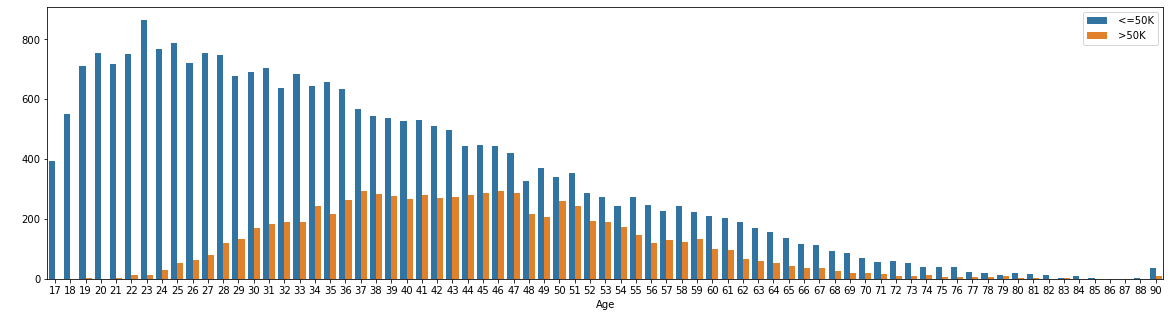

In [4]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(data= df, x='age', hue='income')
#ax.set_title("Income distribution by Age (per income group) ", loc='center', fontweight='bold', fontsize=18)
ax.set_xlabel("Age")
ax.set_ylabel(" ")
ax.legend(loc="upper right") 

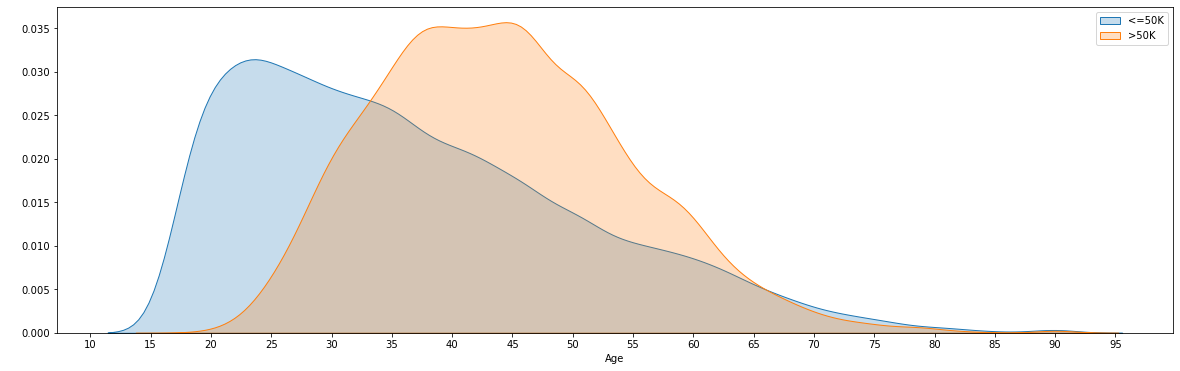

In [10]:
fig = plt.figure(figsize=(20,6))
ax1 = sns.kdeplot(df.loc[df['income']== " <=50K", "age"], label = '<=50K', shade=True)
sns.kdeplot(df.loc[df['income']== " >50K", "age"], label = '>50K', shade=True, ax=ax1)
plt.xticks(np.arange(10,100,5))
#ax1.set_title("Income distribution by Age (by income group)", loc='center', fontweight='bold', fontsize=18)
ax1.set_xlabel("Age")
ax1.set_ylabel(" ")
ax1.legend(loc="upper right") 


In [6]:
countPrivate  = df[df['workclass']== " Private"].shape[0]
countAll = df.shape[0]
print(countPrivate / (countAll ))
##print(countOver / (countOver + countUnder ))

0.6970301894904948


## Working class

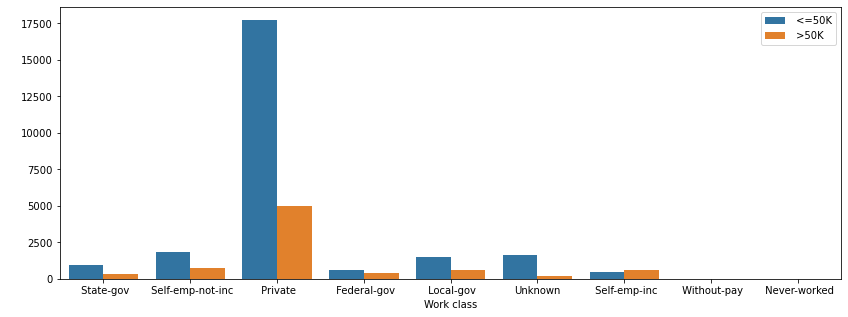

In [7]:

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(14,5))
df.loc[df.workclass == ' ?', 'workclass'] = 'Unknown'
ax2 = sns.countplot(data= df, x='workclass', hue='income')
#ax2.set_title("Income count by work class (by income group)", loc='center', fontweight='bold', fontsize=18)
ax2.set_xlabel("Work class")
ax2.set_ylabel(" ")
ax2.legend(loc="upper right") 

## Education and Education-num
Since Education is a nominal variable and Education-num is an ordinal variable, both representing the same information, we will only use  Education-num for our analysis.



In [9]:
df.groupby(['education','education_num']).size().reset_index().rename(columns={0:'count'})


,education,education_num,count
0,10th,6,933
1,11th,7,1175
2,12th,8,433
3,1st-4th,2,168
4,5th-6th,3,333
5,7th-8th,4,646
6,9th,5,514
7,Assoc-acdm,12,1067
8,Assoc-voc,11,1382
9,Bachelors,13,5355


We can see that tje proportion of individuals with income level >50K is considerably higher after obtaining a bachelors degree or higher. 

<AxesSubplot:xlabel='count', ylabel='education_num'>

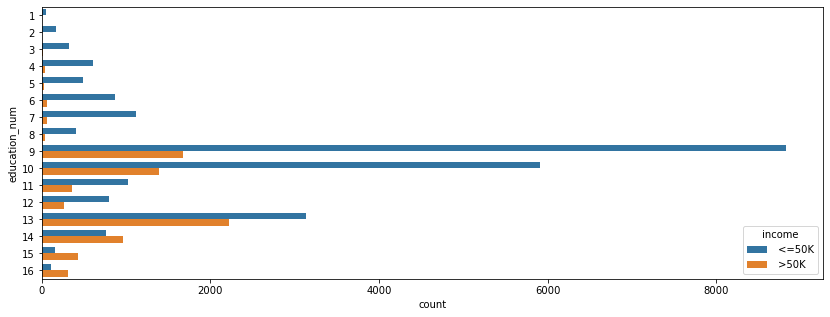

In [18]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= df, y='education_num', hue='income')

## Marital status
Marital Status seems to be a strong predictor of income level for all categories with the exception of "married_civ-spouse". 

<AxesSubplot:xlabel='count', ylabel='marital_status'>

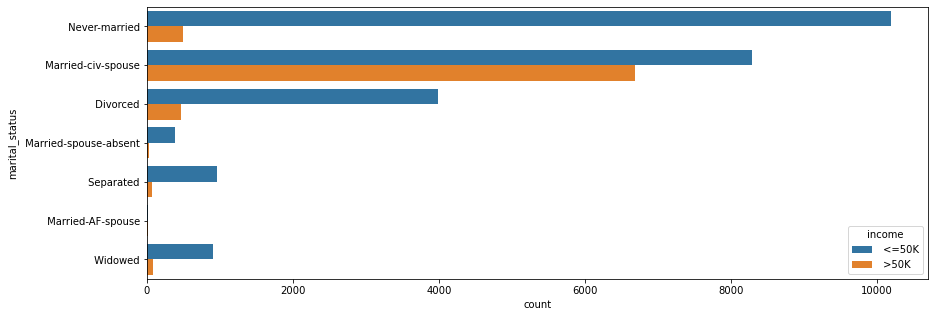

In [19]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= df, y='marital_status', hue='income')


## Ocupation
Ocupation seems to be a strong predictor of income level for many categories. 

<AxesSubplot:xlabel='count', ylabel='occupation'>

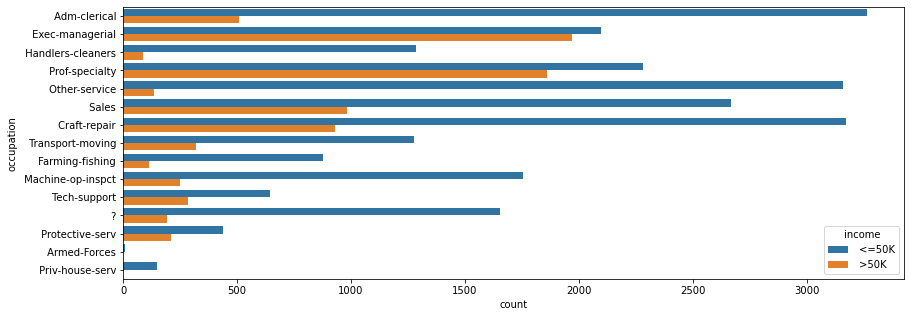

In [20]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= df, y='occupation', hue='income')


## Relationship
Relationship is a strong predictor of income level for most categories. 

<AxesSubplot:xlabel='count', ylabel='relationship'>

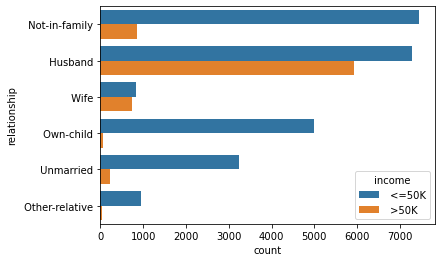

In [21]:
sns.countplot(data= df, y='relationship', hue='income')

## Race
Although for some races can be a good indicator, around 90% of the individuals are from the United-states 

Percentage of White individuals: 0.8542735173981143


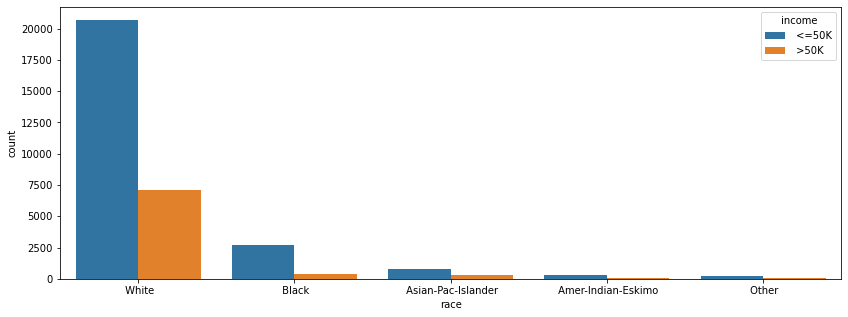

In [22]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data= df, x='race', hue='income')
print("Percentage of White individuals:", df [ (df.race == " White")].shape[0]/df.shape[0])
#g = sns.catplot(x="income", col="race", col_wrap=4, data=df [ (df.race != " White")] ,kind="count", height=2.5)

## Sex
Sex is a strong indicator, 

Given that an individual is a women, the chances her income is  <=50K : 0.8905394113824158


<AxesSubplot:xlabel='sex', ylabel='count'>

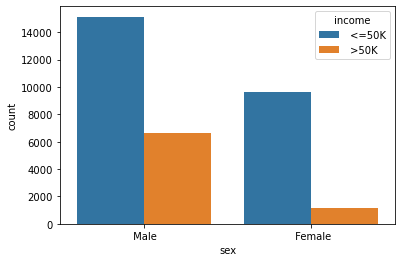

In [23]:
#sns.countplot(data= df, x='race', hue='income')
df_female = df [df.sex == " Female"]
print("Given that an individual is a women, the chances her income is  <=50K :", df_female[df_female.income == " <=50K"].shape[0]/df_female.shape[0])
sns.countplot(data= df, x='sex', hue='income')

## Capital Gain
91% of the records have no capital gain

In [24]:
print("Percentage of the data with no capital gain: ", df [ (df.capital_gain == 0)].shape[0]/df.shape[0])
#print(df [ (df.capital_gain != 0)].shape[0]/df.shape[0])

Percentage of the data with no capital gain:  0.9167101747489328


## Capital loss
95% of the records 'have no capital loss

In [25]:
print("Percentage of the data with no capital loss: ", df [ (df.capital_loss == 0)].shape[0]/df.shape[0])
#sns.catplot(y="capital_loss",x="income", data=df [ (df.capital_loss != 0)], kind="box")

Percentage of the data with no capital loss:  0.9533490986149074


## Hours per week
Although the native country for some countries can be a good indicator, for most cases it doesn't provide additional insight. In addition, aound 90% of the individuals are from the United-states 

<AxesSubplot:xlabel='count', ylabel='hours_per_week_grouped'>

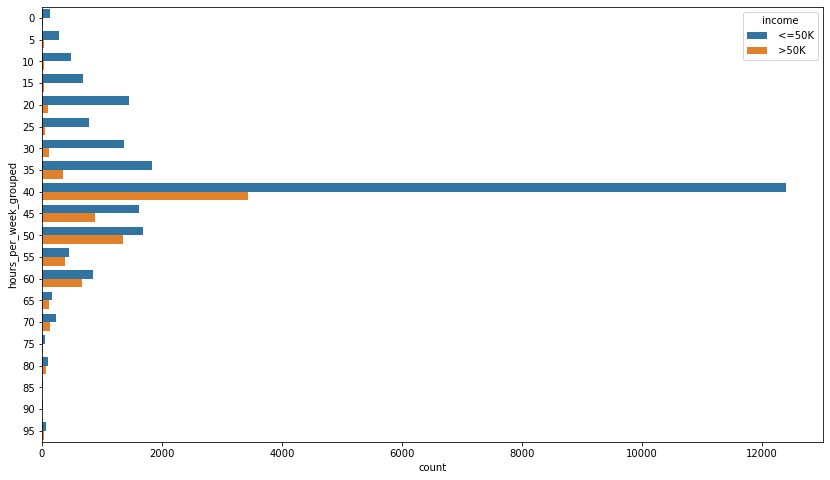

In [52]:
fig = plt.figure(figsize=(14,8))
df["hours_per_week_grouped"] = (df.hours_per_week/5.0).astype("int64") * 5
sns.countplot(data= df, y='hours_per_week_grouped', hue='income')


## Native country
Although the native country for some countries can be a good indicator, for most cases it doesn't provide additional insight. In addition, aound 90% of the individuals are from the United-states 

Percentage of individuals from United-States: 0.895857006848684


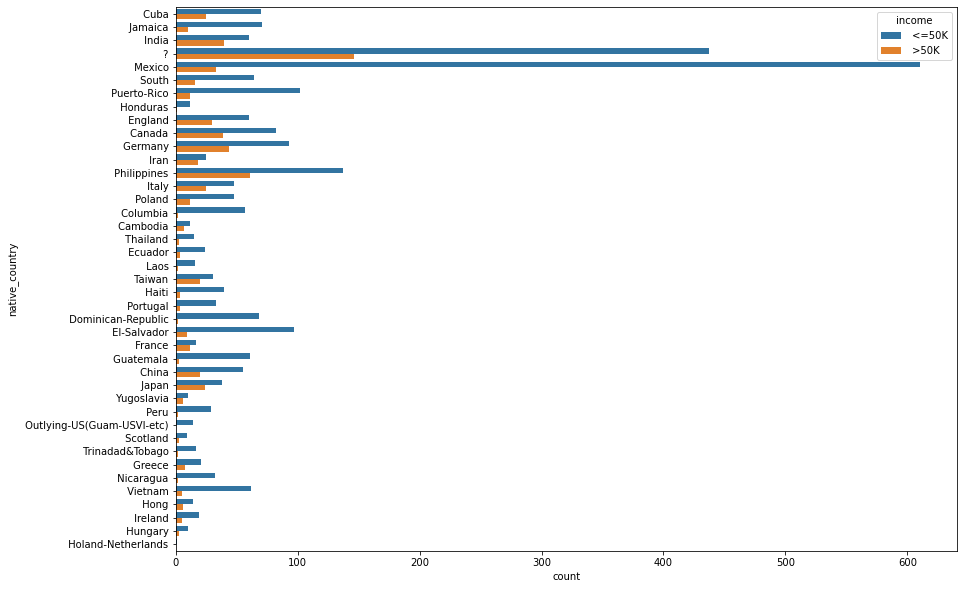

In [28]:
print("Percentage of individuals from United-States:", df [ (df.native_country == " United-States")].shape[0]/df.shape[0])
fig = plt.figure(figsize=(14,10))
ax2 = sns.countplot(data= df [ (df.native_country != " United-States")], y='native_country', hue='income')


#### Based on this analysis, the most relevant factors in determining an individual's income are : 

- Education 
- Sex
- Marital Status
- Occupation

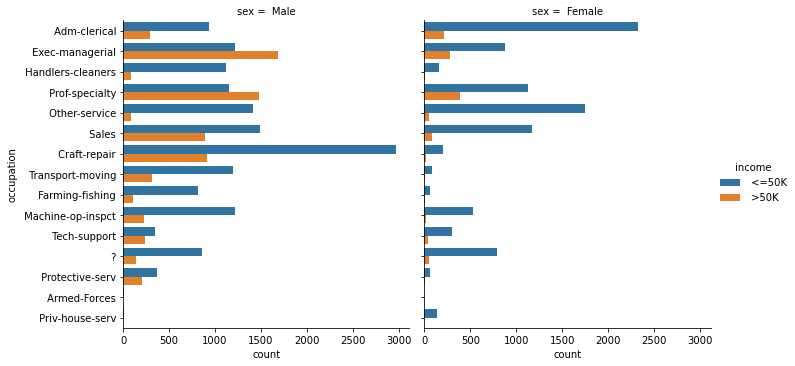

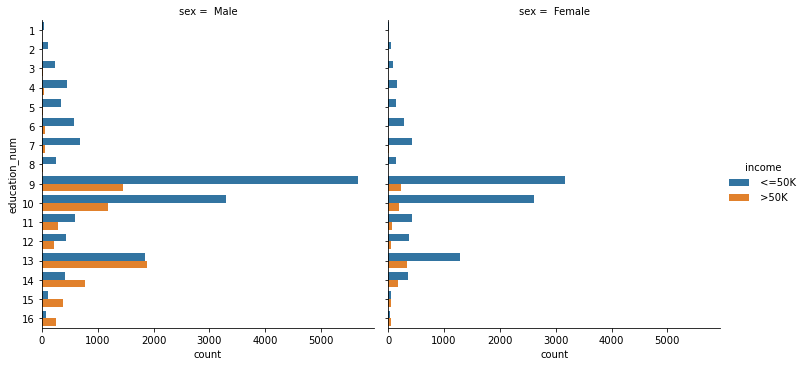

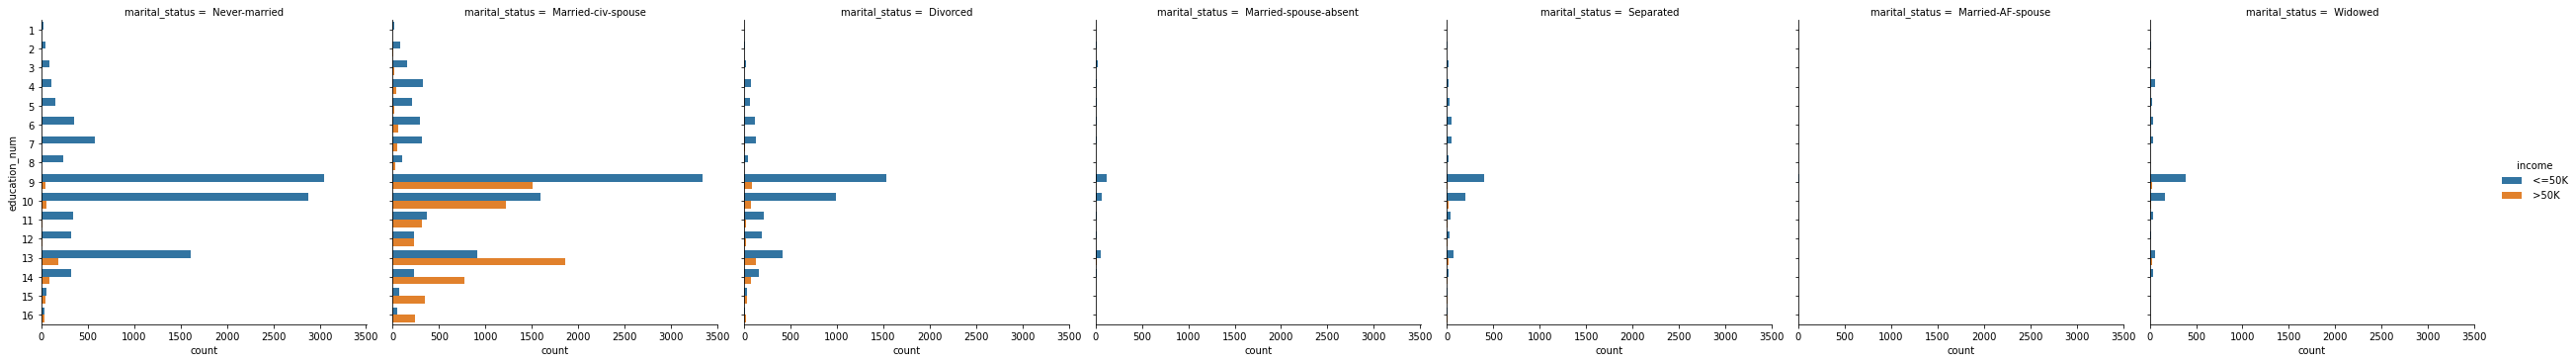

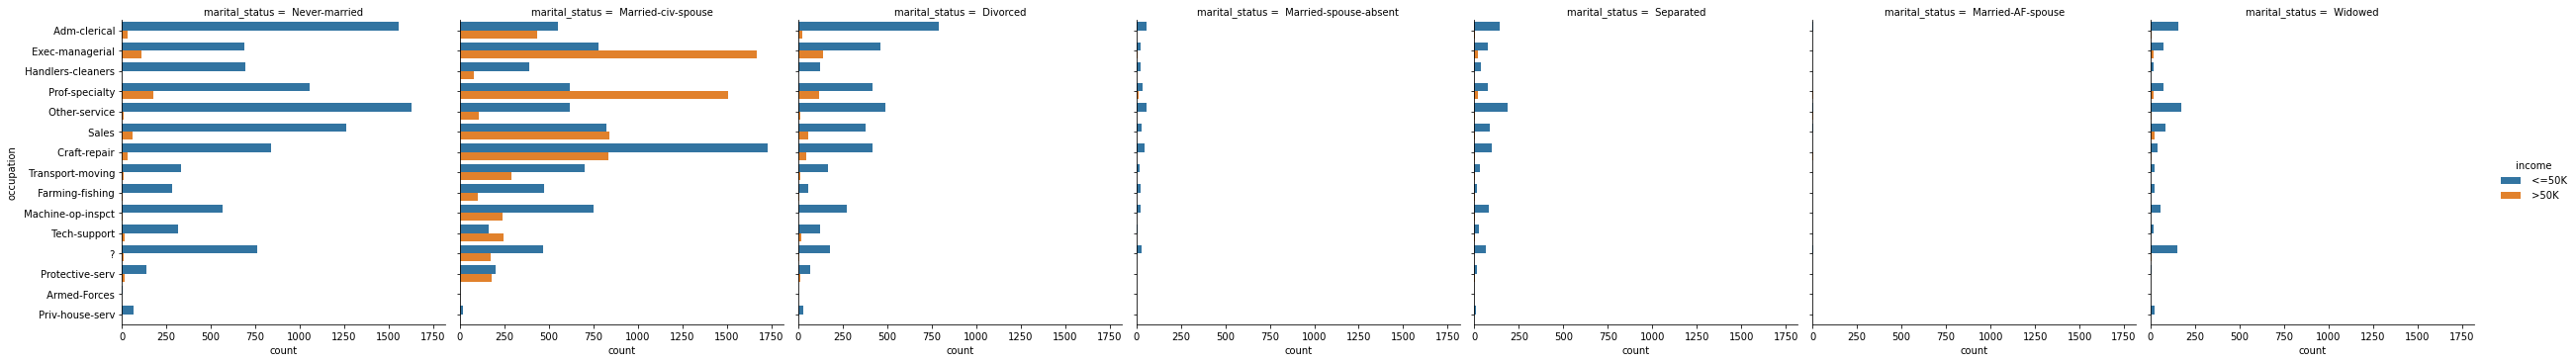

In [65]:
sns.catplot(col="sex",y="occupation",hue="income", data=df,kind="count")
sns.catplot(col="sex",y="education_num",hue="income", data=df,kind="count")
sns.catplot(col="marital_status",y="education_num",hue="income", data=df,kind="count")
sns.catplot(col="marital_status",y="occupation",hue="income", data=df,kind="count")
